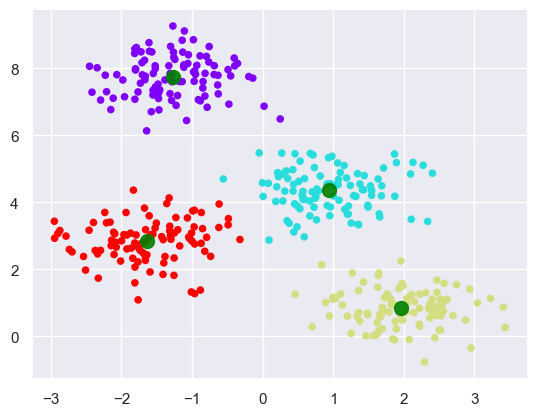

[[  0   0   0 100]
 [100   0   1   0]
 [  0 100   0   0]
 [  0   0  99   0]]


In [2]:
#Пример задания центров
# Начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
# Сгенерируем данные
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0) 
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
centers=kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1],c=y_kmeans, s = 20,cmap="rainbow")
plt.scatter(centers[:, 0], centers[:, 1],c="Green", s = 100,alpha=0.9)
plt.show()
print(confusion_matrix(y_kmeans,y_true))
# print(y_true)
# print(y_kmeans)
# print(X)

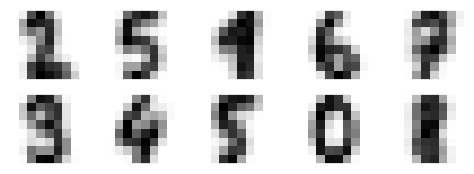

In [3]:
#Кластеризация
from sklearn.datasets import load_digits
digits = load_digits()
kmeans= KMeans(n_clusters=10,random_state=0)
clusters=kmeans.fit_predict(digits.data)
fig,ax=plt.subplots(2,5,figsize=(6,2))
centers=kmeans.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,centers):
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,interpolation='nearest',cmap=plt.cm.binary)


Задание 1
Дан массив данных

Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

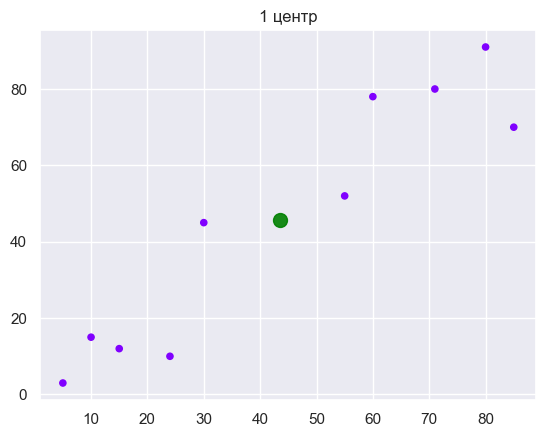

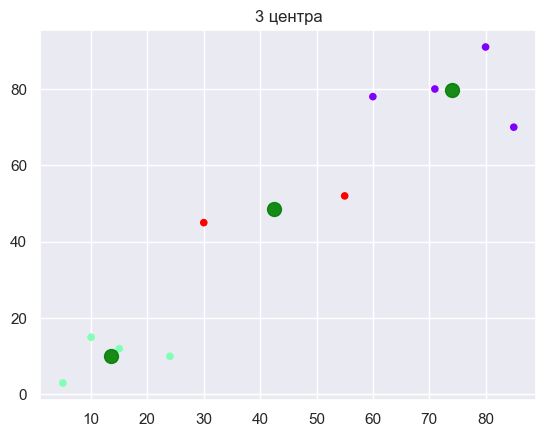

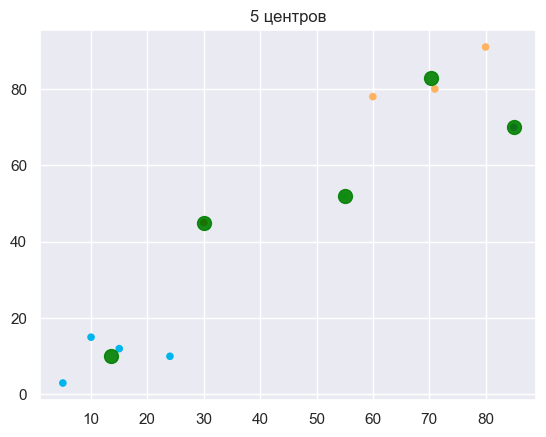

In [4]:
#решение задания 1
X=np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91],])
kmeans1= KMeans(n_clusters=1,random_state=0)
kmeans2= KMeans(n_clusters=3,random_state=0)
kmeans3= KMeans(n_clusters=5,random_state=0)
kmeans1.fit(X)
y_kmeans1=kmeans1.predict(X)
centers1=kmeans1.cluster_centers_
plt.title("1 центр")
plt.scatter(X[:, 0], X[:, 1],c=y_kmeans1, s = 20,cmap="rainbow")
plt.scatter(centers1[:, 0], centers1[:, 1],c="Green", s = 100,alpha=0.9)
plt.show()
kmeans2.fit(X)
y_kmeans2=kmeans2.predict(X)
centers2=kmeans2.cluster_centers_
plt.title("3 центра")
plt.scatter(X[:, 0], X[:, 1],c=y_kmeans2, s = 20,cmap="rainbow")
plt.scatter(centers2[:, 0], centers2[:, 1],c="Green", s = 100,alpha=0.9)
plt.show()
kmeans3.fit(X)
y_kmeans3=kmeans3.predict(X)
centers3=kmeans3.cluster_centers_
plt.title("5 центров")
plt.scatter(X[:, 0], X[:, 1],c=y_kmeans3, s = 20,cmap="rainbow")
plt.scatter(centers3[:, 0], centers3[:, 1],c="Green", s = 100,alpha=0.9)
plt.show()

Задание 2
Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

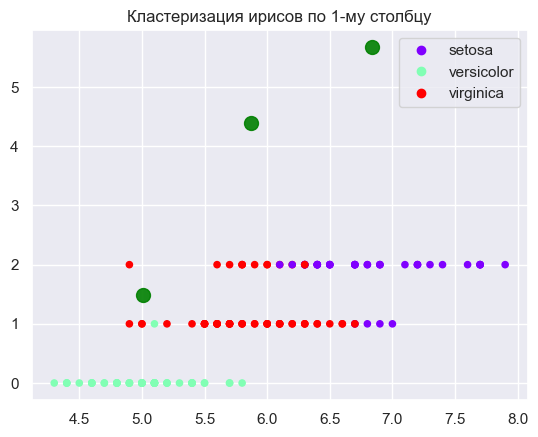

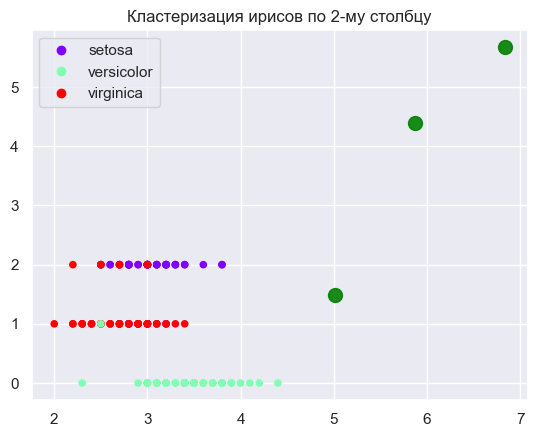

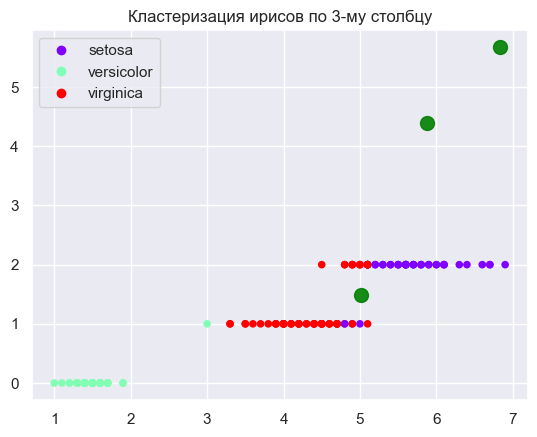

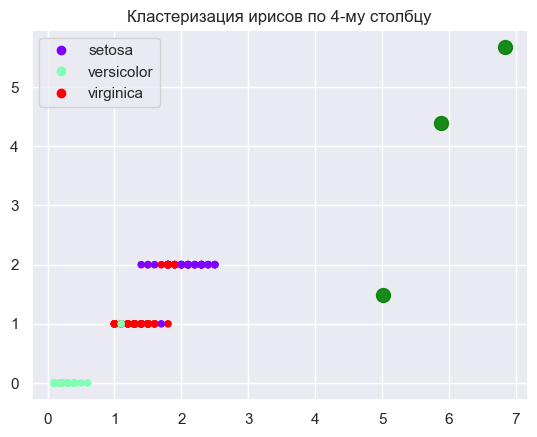

Количество кластеров: 2 Точность: 0.7097529826994816
Количество кластеров: 3 Точность: 0.5890584158017611
Количество кластеров: 4 Точность: 0.5645593160995663
Количество кластеров: 5 Точность: 0.5615762840838052
Количество кластеров: 6 Точность: 0.5200106104623368
Количество кластеров: 7 Точность: 0.5401920708873774


In [5]:
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
import pandas as pd

iris=load_iris()
legend = ['setosa', 'versicolor', 'virginica']
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
X = df[['sepal length (cm)', 'petal length (cm)']]
kmeans = KMeans(n_clusters=3, random_state=4).fit(X)
y_kmeans=kmeans.predict(X)
centers=kmeans.cluster_centers_
for i in range (4):
    plt.title(f"Кластеризация ирисов по {i+1}-му столбцу")
    p=plt.scatter(iris.data[:,i], iris.target,c=y_kmeans, s = 20,cmap="rainbow")
    plt.legend(handles=p.legend_elements()[0],
               labels=legend)
    plt.scatter(centers[:, 0], centers[:, 1],c="Green", s = 100,alpha=0.9)
    plt.show()
#print(confusion_matrix(y_kmeans,iris.target))
for k in range(2,8):
    kmeans = KMeans(n_clusters=k, random_state=4).fit(X)
    y_kmeans=kmeans.predict(X)
    score = silhouette_score(X, y_kmeans)
    print("Количество кластеров:",k,"Точность:", score)

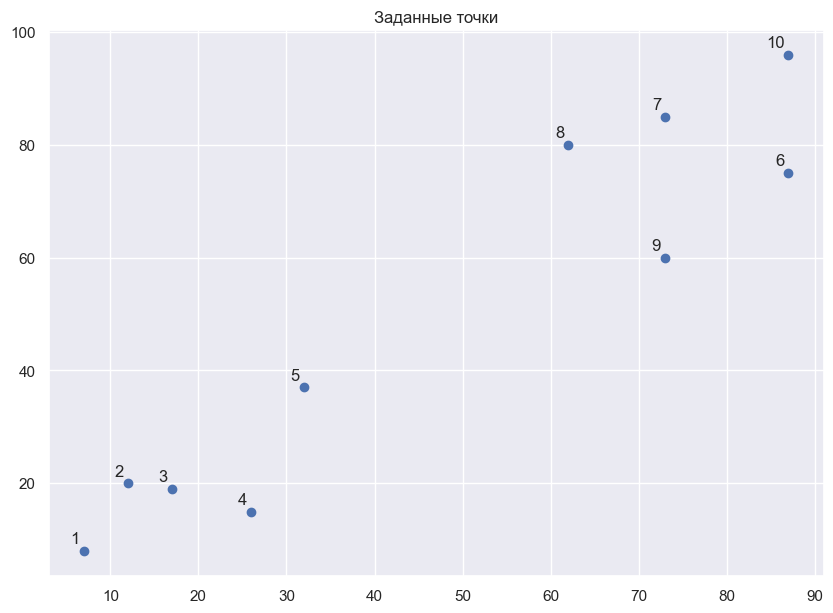

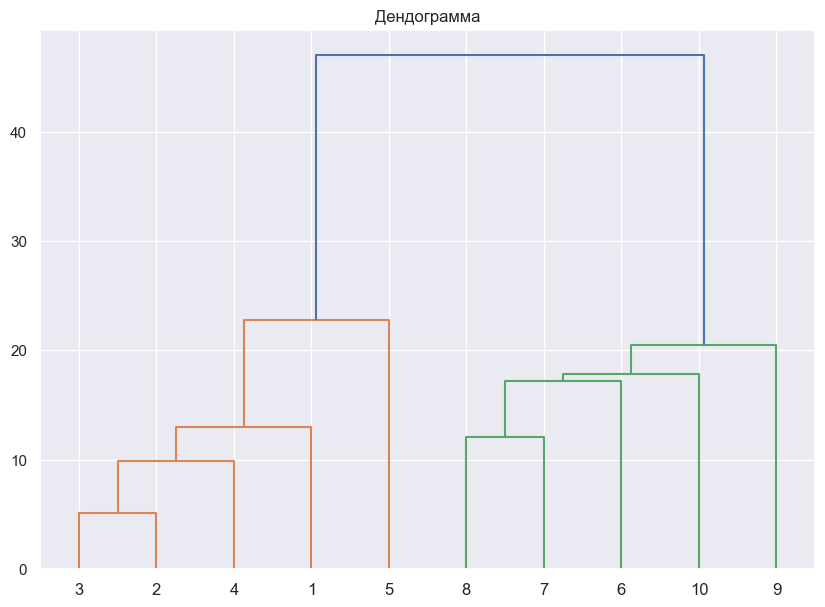

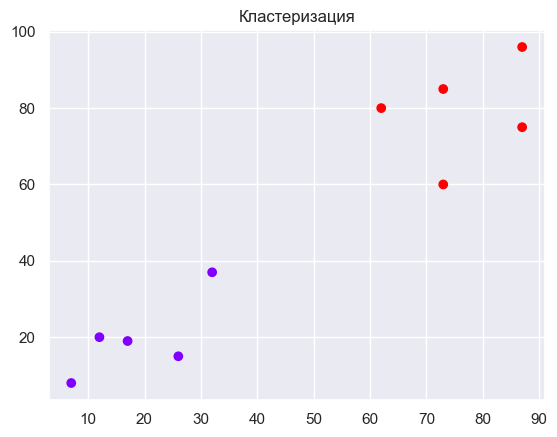

In [6]:
#Построить дендрограмму для заданного массива данных.
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 
X = np.array([[7,8], [12,20], [17,19], [26,15], [32,37], [87,75], [73,85], [62,80], [73,60], [87,96],]) 
labels = range(1, 11)

plt.figure(figsize = (10, 7))
plt.title("Заданные точки")
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:,0],X[:,1], label = 'True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label,xy = (x, y), xytext = (-3, 3),textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

linked = linkage(X, 'single')
labellist = range(1, 11)
plt.figure(figsize = (10, 7))
plt.title("Дендограмма")
dendrogram(linked, orientation = 'top', labels = labellist,
    distance_sort ='descending',show_leaf_counts = True)
plt.show()

cluster = AgglomerativeClustering(n_clusters = 2,linkage = 'ward') 
cluster.fit_predict(X) 
plt.title("Кластеризация")
plt.scatter(X[:,0],X[:,1], c = cluster.labels_,cmap = 'rainbow')
plt.show()

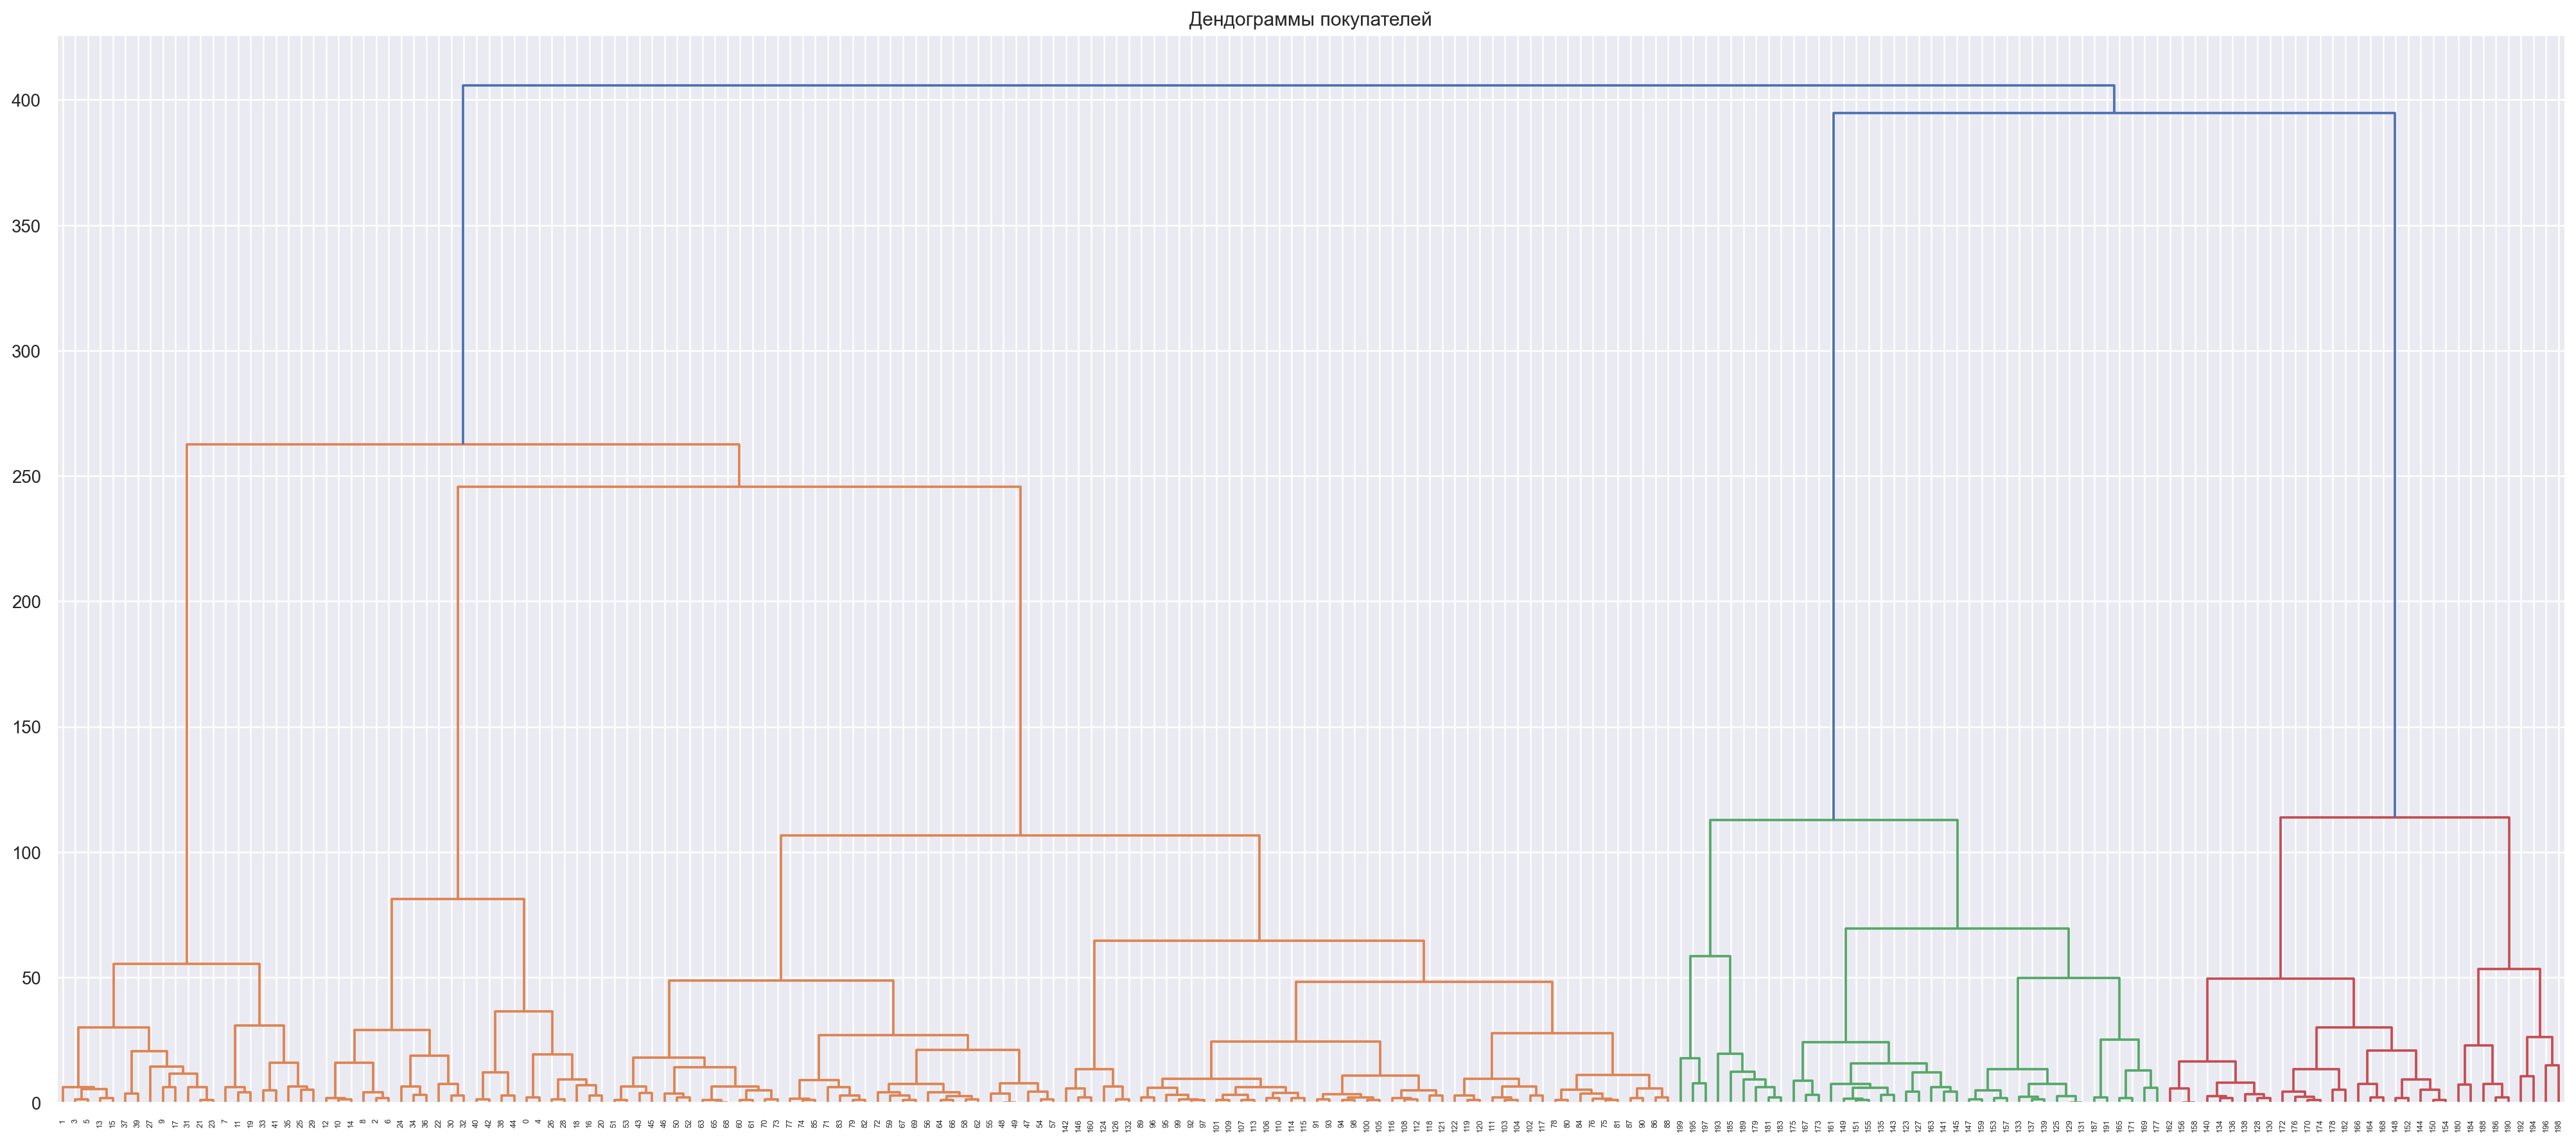

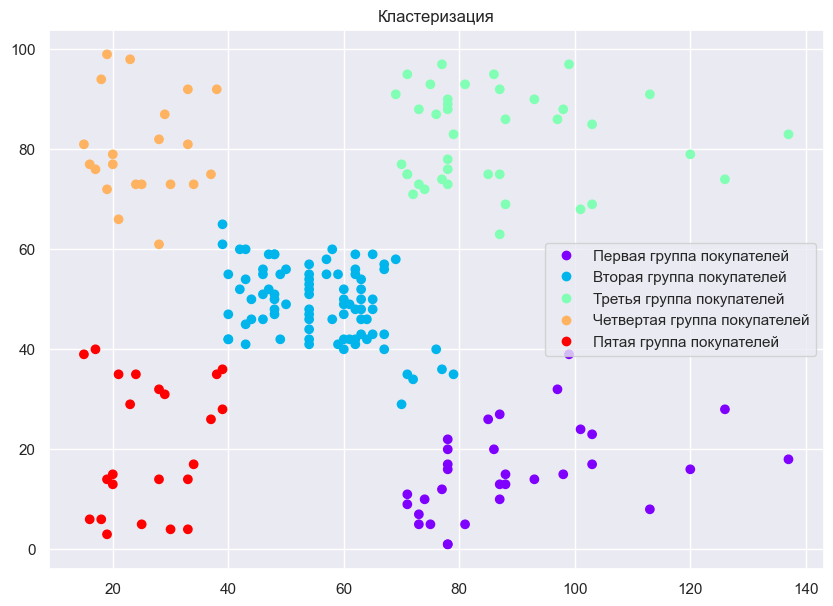

In [10]:
#Иерархическая кластеризация
import scipy.cluster.hierarchy as shc
url="https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv"
c_d=pd.read_csv(url)
data=c_d.iloc[:,3:5].values
legend=['Первая группа покупателей','Вторая группа покупателей','Третья группа покупателей','Четвертая группа покупателей','Пятая группа покупателей']
plt.figure(figsize=(28,12),dpi=180)
plt.title("Дендограммы покупателей")
dend=shc.dendrogram(shc.linkage(data,method='ward'))

cluster=AgglomerativeClustering(n_clusters=5,linkage='ward')
cluster.fit_predict(data)
plt.figure(figsize=(10,7))
plt.title("Кластеризация")
# print(data[:,0])
# print(data[:,1])
#print(cluster.labels_)
p=plt.scatter(data[:,0],data[:,1],c=cluster.labels_,cmap='rainbow')
plt.legend(handles=p.legend_elements()[0],labels=legend)
plt.show()



Задание 3
Выполните иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).


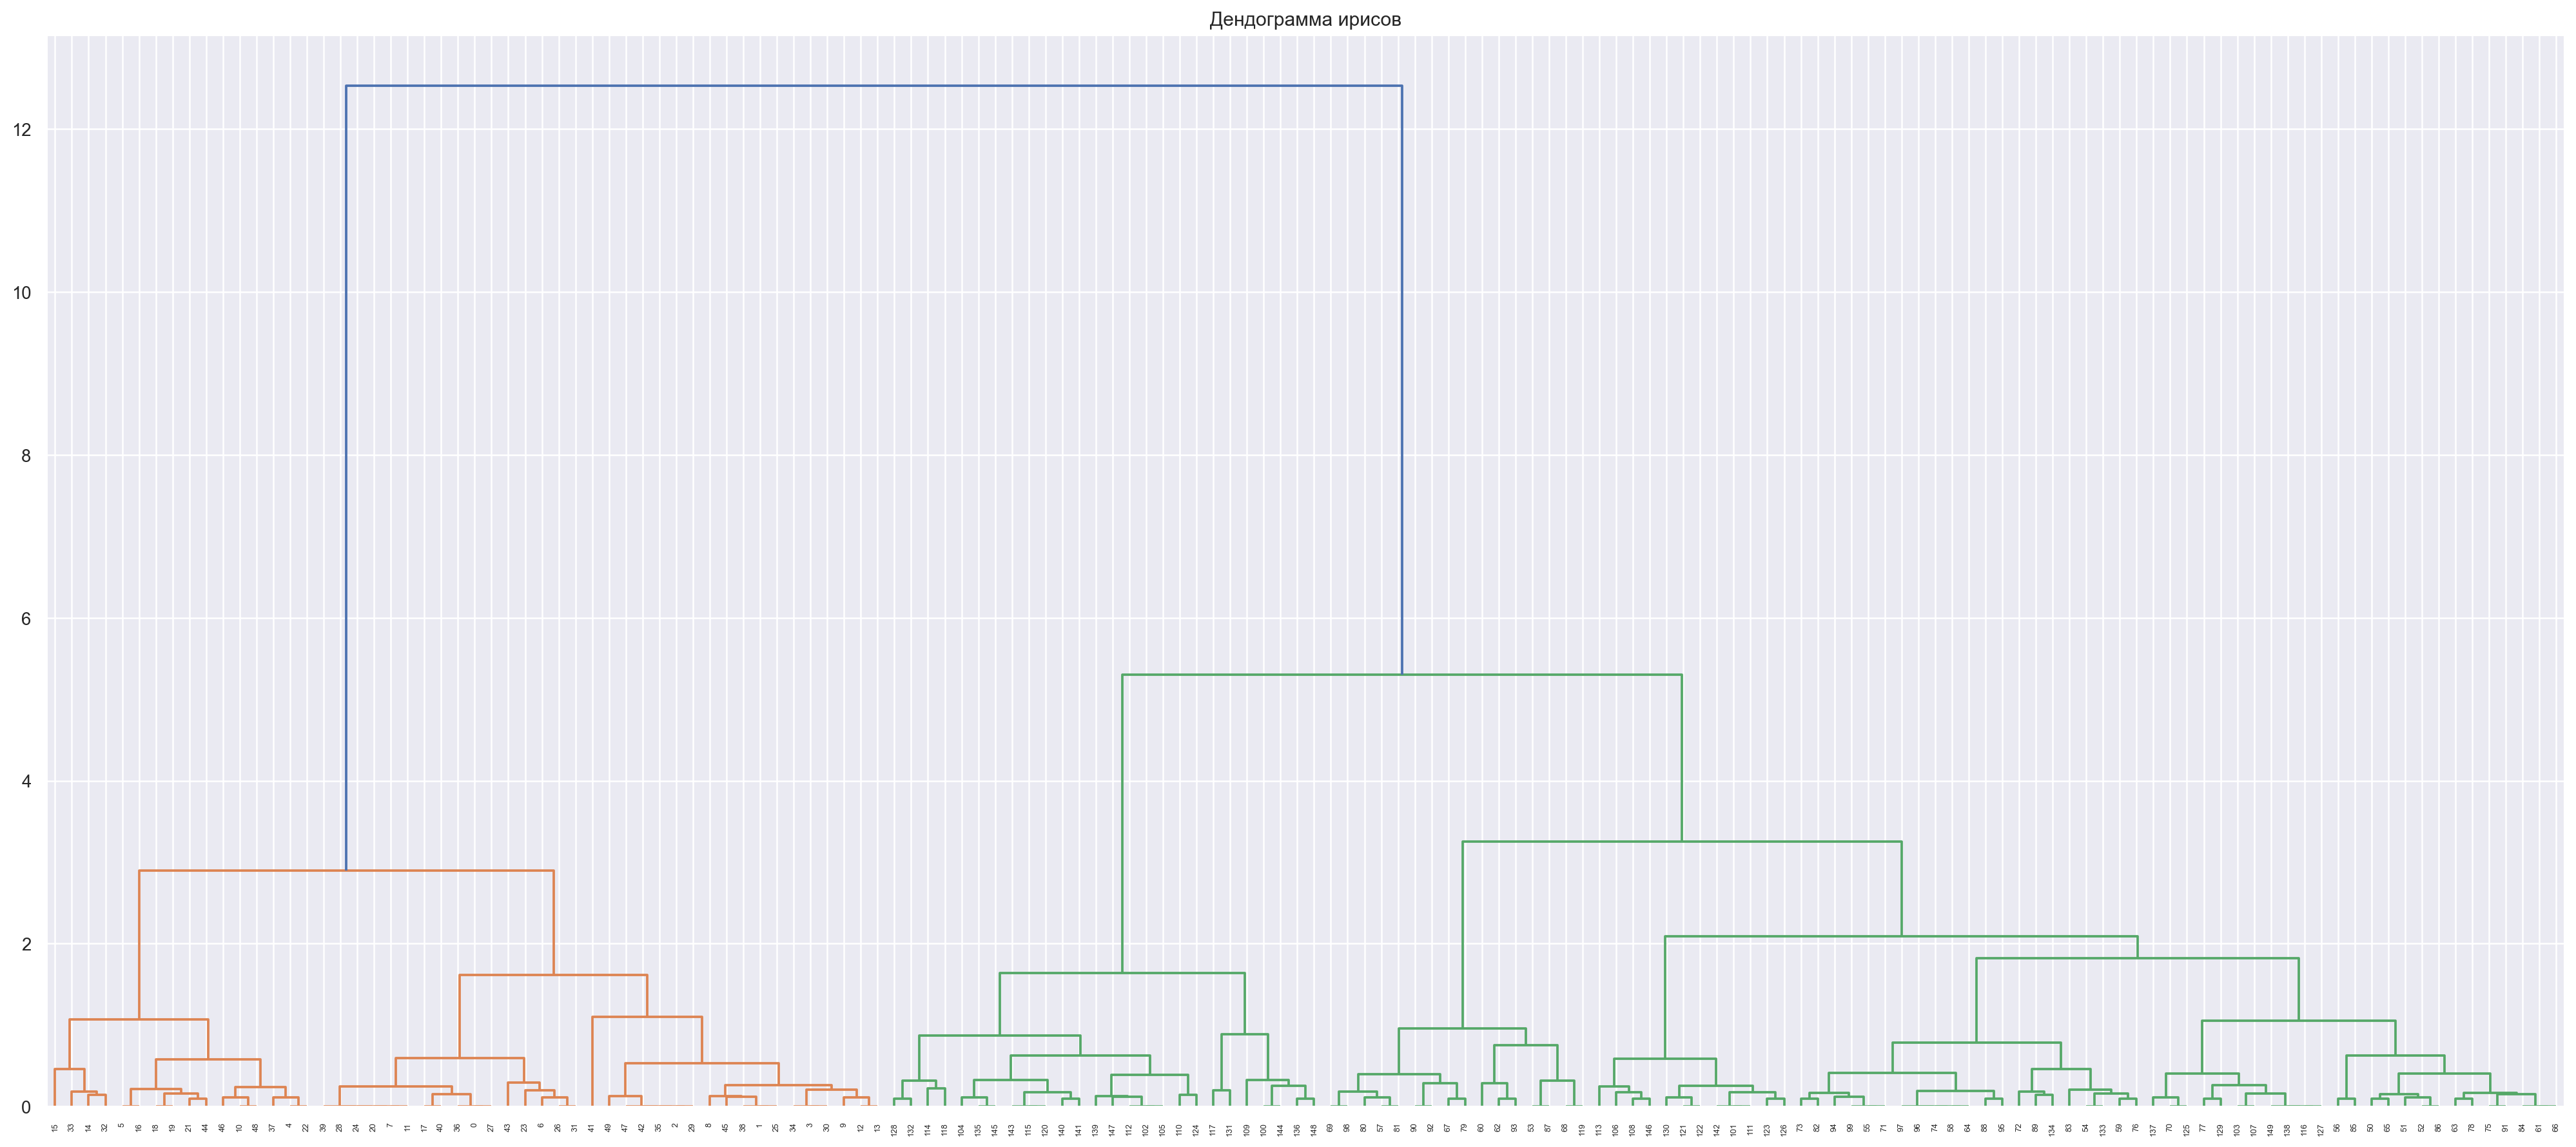

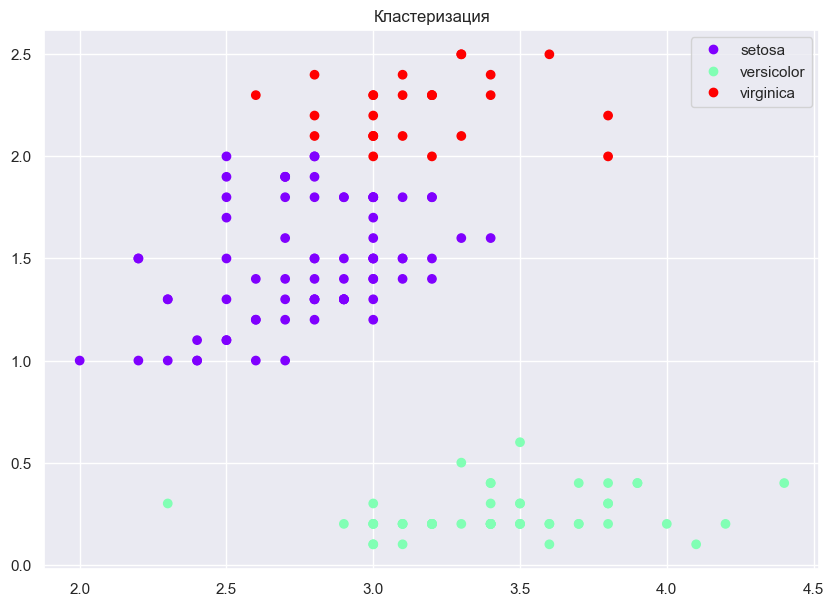

Точность: 0.510204081632653


C:\Users\borga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
iris=load_iris()
legend = ['setosa', 'versicolor', 'virginica']
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
X = df[['sepal width (cm)', 'petal width (cm)']]
plt.figure(figsize=(28,12),dpi=180)
plt.title("Дендограмма ирисов")
dend=shc.dendrogram(shc.linkage(X,method='ward'))

cluster=AgglomerativeClustering(n_clusters=3,linkage='ward')
y=cluster.fit_predict(X)
plt.figure(figsize=(10,7))
plt.title("Кластеризация")
p=plt.scatter(X.iloc[:,0],X.iloc[:,1],c=cluster.labels_,cmap='rainbow')
plt.legend(handles=p.legend_elements()[0],labels=legend)
plt.show()
score=silhouette_score(y.reshape(-1,1),iris.target.reshape(-1,1))
print("Точность:",score)